In [1]:
import numpy as np

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

import random

# Basic concepts

**Population** (**Генеральная совокупность**) is the entire group that you want to draw conclusions about.

**Sample** (**Выборка**) is the specific group that you will collect data from. The size of the sample is always less than the total size of the population.

In [2]:
# Let's assume that we have 50 samples of man's height 

x = np.array([196.43594813, 168.29103996, 197.15166556, 168.72397136,
       195.35552193, 181.48916805, 174.88024841, 183.66834501,
       170.71119697, 187.82193788, 174.28321576, 176.64470089,
       173.36563673, 192.98727241, 169.92517585, 178.24113001,
       183.48963061, 178.77100348, 174.6307954 , 181.6223938 ,
       181.88752708, 176.84472862, 184.65971665, 164.55984174,
       173.93008558, 187.59872113, 174.83841079, 175.26581332,
       171.68770096, 162.35413777, 173.82451479, 185.93672084,
       200.59426059, 174.3957263 , 161.82825939, 182.16347002,
       182.83990716, 157.50936442, 166.82378597, 172.15257292,
       177.08779444, 161.29176841, 183.08787884, 178.44563342,
       178.13632199, 196.93007705, 180.13512734, 170.1606147 ,
       176.3682163 , 177.34754129])

In [3]:
def draw_histogram(x, step=5):
    print(stats.normaltest(x))
    
    fig, ax = plt.subplots()
    ax.hist(x, bins=np.arange(x.min(), x.max(), step))

NormaltestResult(statistic=1.1891336656802285, pvalue=0.5518015364113453)


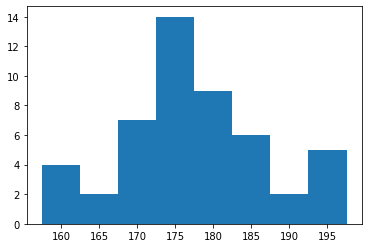

In [4]:
draw_histogram(x)

## Mean

**Mean** (**Математическое ожидание**) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set. 

So it is same as average.

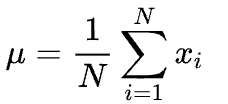

In [5]:
def calculate_mean(x):
    return sum(x) / x.size

print("mean:", calculate_mean(x))

mean: 177.9835247604


In [6]:
print("mean:", np.mean(x))

mean: 177.9835247604


## Median and p-th Percentile


**Median** (**Медиана**) is the middle value when a data set is ordered from least to greatest.

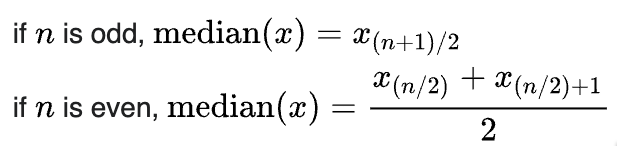

In [7]:
def calculate_median(x):
    sorted_x = sorted(x)
    
    if(x.size % 2 == 1):
        return sorted_x[int((x.size + 1) / 2) - 1]
    else:
        return (sorted_x[int(x.size / 2) - 1] + sorted_x[int(x.size / 2 + 1) - 1]) / 2


print("median:", calculate_median(x))

median: 176.96626153


In [8]:
print("median:", np.median(x))

median: 176.96626153


**Median** is special case of **p-th Percentile** when k = 50%. So to calculate **p-th Percentile** we also need to get value from ordered data with index that proportional stands on p-th position.

So idex is calculated as:

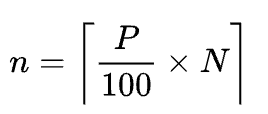

where P - is procentile and N - is size of sata set.


In [9]:
print("50-th precentile (same as median)", np.percentile(x, 50))

print("95-th precentile (same as median)", np.percentile(x, 95))

50-th precentile (same as median) 176.96626153
95-th precentile (same as median) 196.70771903600001


## Standard deviation (Std)

**Standard deviation or Std (Среднеквадратическое отклонение)** - is a measure of the amount of variation or dispersion of a set of values

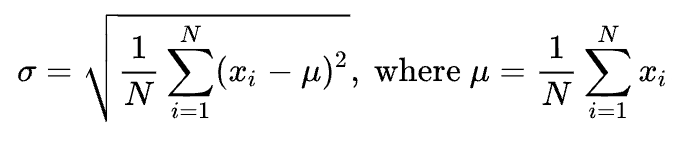

**Variance** (**Дисперсия**) is just:

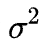

In [10]:
print("Std:", np.std(x))

Std: 9.638456514438131


## Chebyshev's inequality

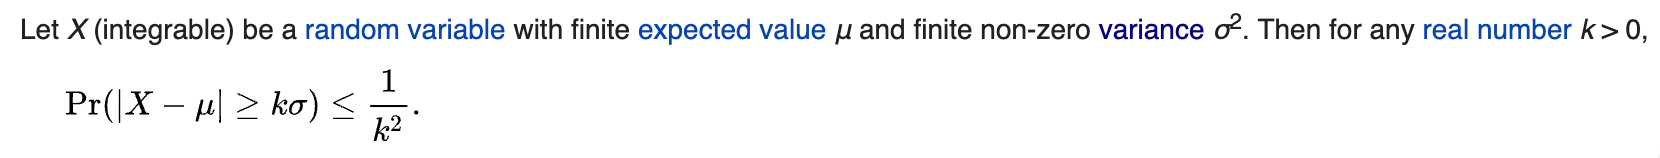

So it means that probability of abs(np.mean(x) - x[i]) > k * np.std(x) will be less than:

100% for k = 1

25% for k = 2

11,111111% for k = 3

6,25% for k = 4

4% for k = 5

2,777778% for k = 6

In [11]:
print("So for example, more than 96% (100% - 4%) of data should be in diapazon from: ", np.mean(x) - 5 * np.std(x), "to:", np.mean(x) + 5 * np.std(x))

So for example, more than 96% (100% - 4%) of data should be in diapazon from:  129.79124218820934 to: 226.17580733259067


## Normal distribution

It a distribution that describes well variables that are sum of big number of factors that.

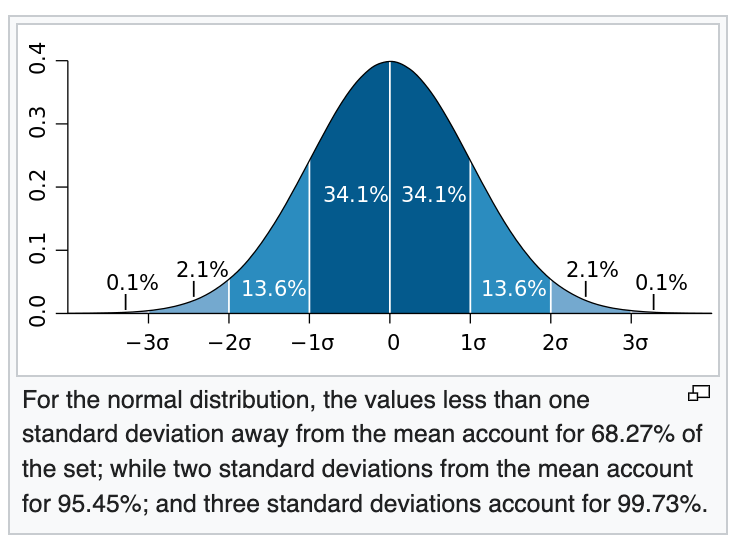

So if comparing to Chebyshev's inequality, if data is distributed normally, probability of abs(np.mean(x) - x[i]) > k * np.std(x) will be less than:

68.27% for k = 1

95.45% for k = 2

99.73% for k = 3

Also normal distribution theoretical has same mean and median.

In [12]:
print(stats.normaltest(x))

NormaltestResult(statistic=1.1891336656802285, pvalue=0.5518015364113453)


# Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 

In [13]:
# Let's assume y is size of feet

y = np.array([(X - 100) / 10 + 15 + random.randint(0, 100) / 25 for X in x])

In [14]:
# and check correlation for the height and the size of feet

stats.pearsonr(x, y)

(0.6955531764823099, 2.0684238109817367e-08)

# Statistically significant difference

About statistical experimental design: 

- experiment is taken to discover causal relationship (Причинно-следственная связь)
- an experiment should have 2 groups: one effected by the investigated cause and another wothout it (control group). Members to the experiment groups should be taken randomly. So called A/B test
- obtained results should be compared by **appropriate statistical test** with chousen confidence level (so called p-value, usually is taken 95%)

## T - test


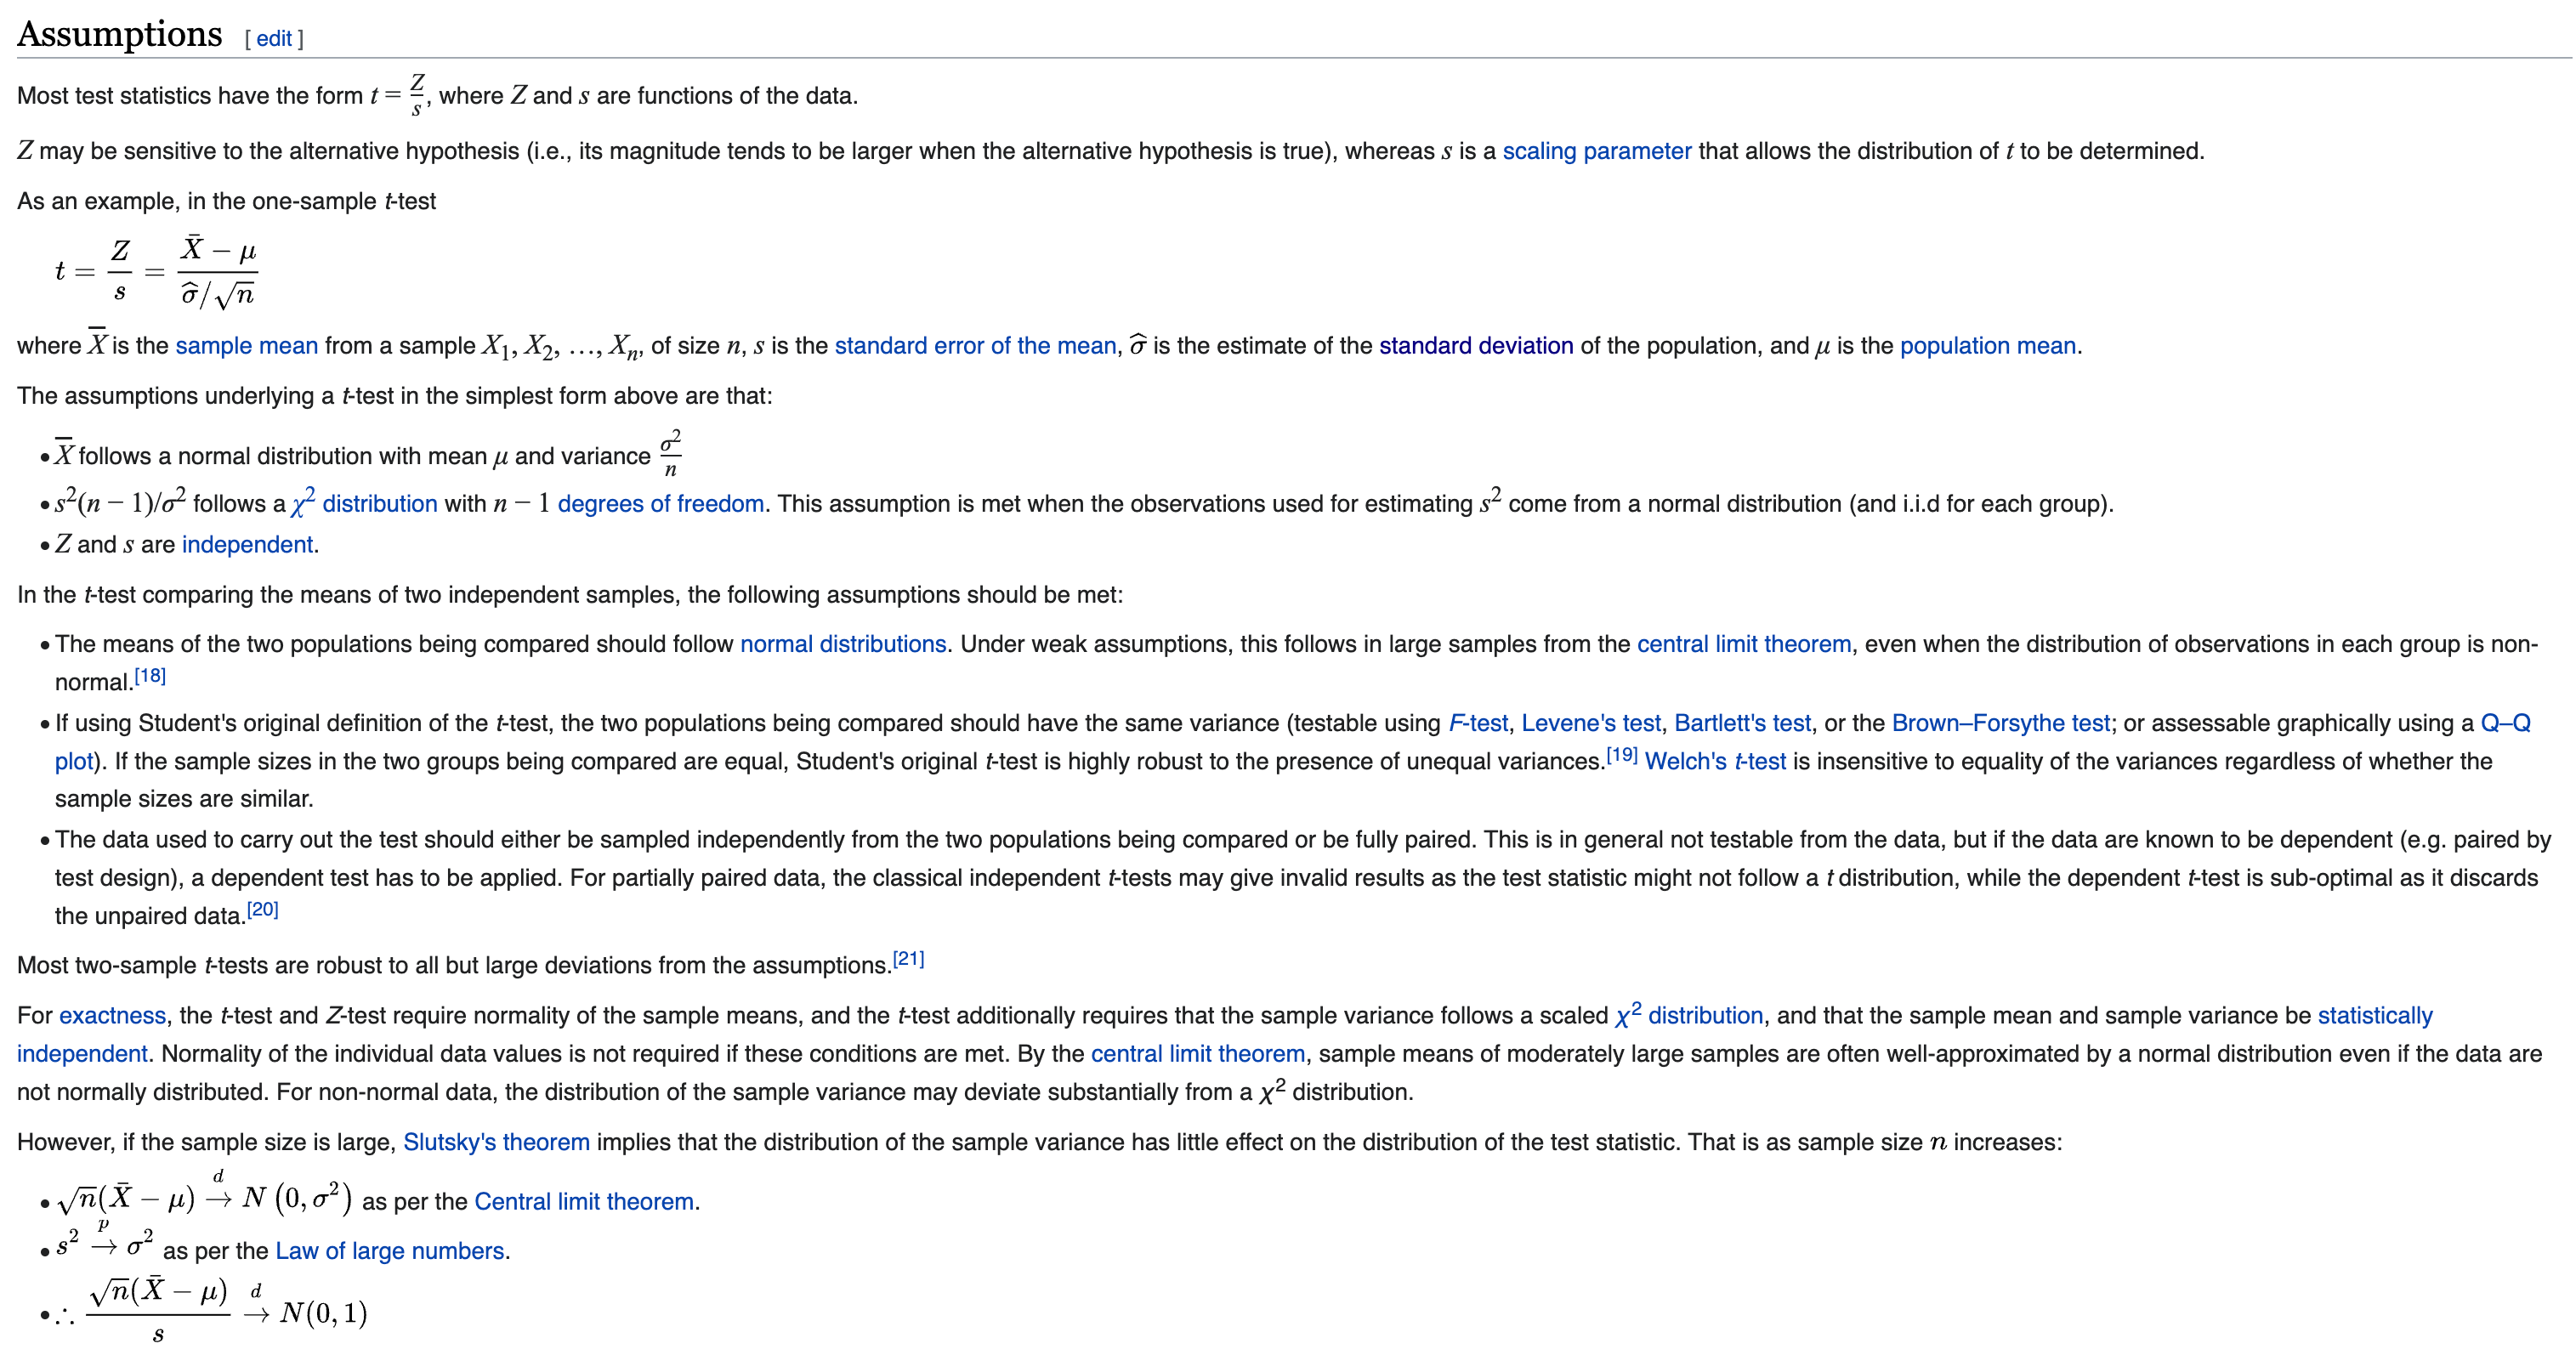

mean_x1: 26997.52
mean_x2: 29392.1
std_x1: 7129.29483536766
std_x2: 6072.9022098169835
NormaltestResult(statistic=80.45154810172119, pvalue=3.389754917418798e-18)
NormaltestResult(statistic=101.73875612168453, pvalue=8.08555452867395e-23)


Ttest_indResult(statistic=-1.7898238757258154, pvalue=0.07657076990457275)

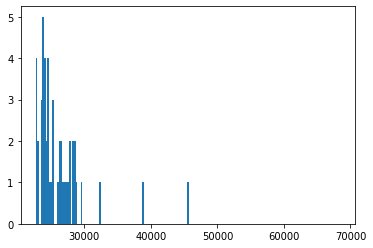

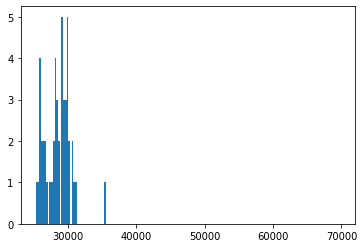

In [15]:
x1 = np.array([68560, 24570, 23667, 38809, 28520, 24153, 24157, 26693, 26841, 23926, 26265, 28201, 24472, 27762, 27904, 25973, 23126, 24694, 23523, 24275, 22879, 24816, 22851, 25292, 25416, 23979, 27359, 28600, 29488, 45666, 28382, 26676, 24512, 22699, 23992, 23496, 23881, 23804, 24415, 23042, 22809, 23724, 27516, 27087, 28745, 25214, 23836, 32340, 26230, 25039])
x2 = np.array([69867, 27693, 28282, 28699, 26765, 27060, 27884, 27472, 26697, 25621, 26003, 26170, 26464, 25912, 26381, 25855, 26206, 25896, 25315, 35386, 29976, 29433, 30007, 29691, 30811, 30098, 29968, 30253, 30775, 28170, 28058, 28403, 28374, 28487, 28601, 31037, 29736, 28243, 28287, 29594, 29305, 29065, 29170, 29471, 29953, 29430, 29240, 29853, 29314, 31174])

print("mean_x1:", np.mean(x1))
print("mean_x2:", np.mean(x2))

print("std_x1:", np.std(x1))
print("std_x2:", np.std(x2))

draw_histogram(x1, step=250)
draw_histogram(x2, step=250)

stats.ttest_ind(x1, x2)

## Mann-Whitney U rank test

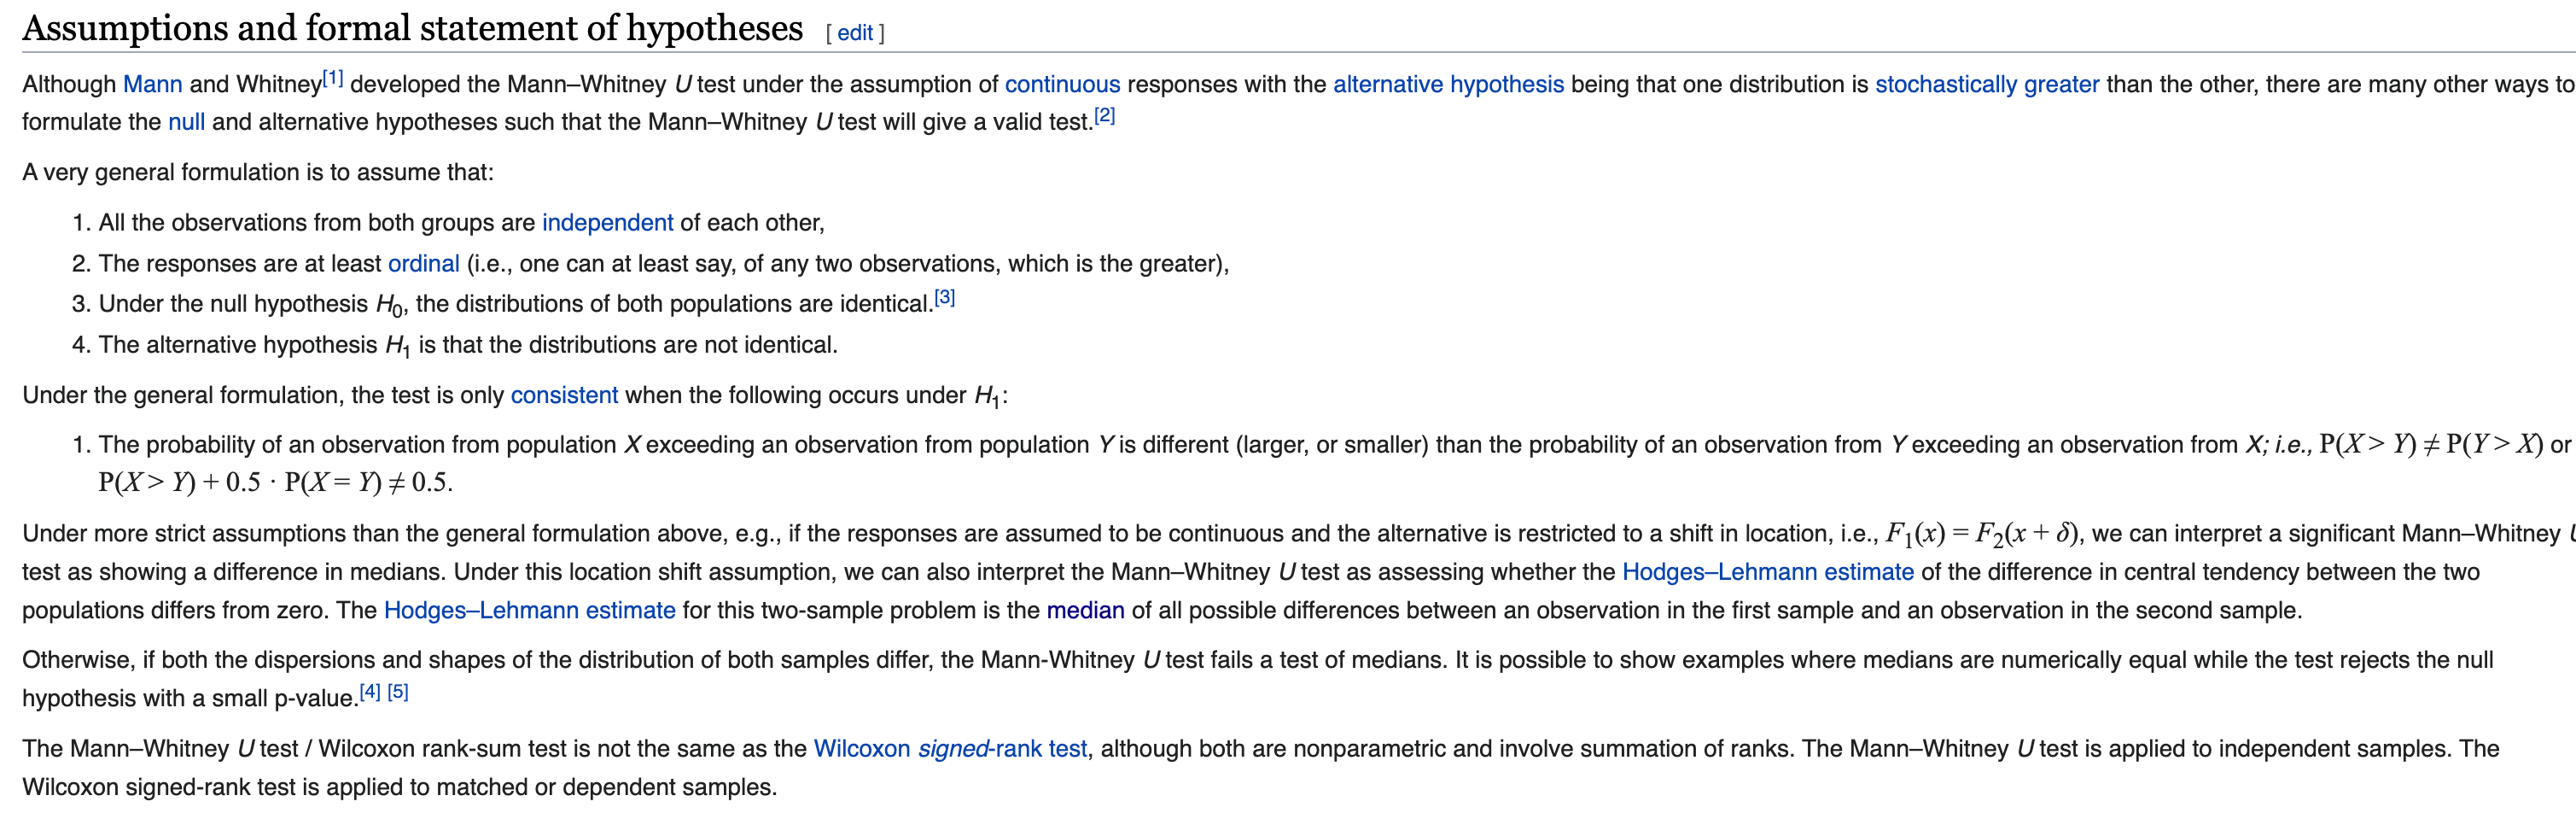

In [16]:
x1 = np.array([68560, 24570, 23667, 38809, 28520, 24153, 24157, 26693, 26841, 23926, 26265, 28201, 24472, 27762, 27904, 25973, 23126, 24694, 23523, 24275, 22879, 24816, 22851, 25292, 25416, 23979, 27359, 28600, 29488, 45666, 28382, 26676, 24512, 22699, 23992, 23496, 23881, 23804, 24415, 23042, 22809, 23724, 27516, 27087, 28745, 25214, 23836, 32340, 26230, 25039])
x2 = np.array([69867, 27693, 28282, 28699, 26765, 27060, 27884, 27472, 26697, 25621, 26003, 26170, 26464, 25912, 26381, 25855, 26206, 25896, 25315, 35386, 29976, 29433, 30007, 29691, 30811, 30098, 29968, 30253, 30775, 28170, 28058, 28403, 28374, 28487, 28601, 31037, 29736, 28243, 28287, 29594, 29305, 29065, 29170, 29471, 29953, 29430, 29240, 29853, 29314, 31174])

stats.mannwhitneyu(x1, x2)

MannwhitneyuResult(statistic=468.0, pvalue=7.143643603214522e-08)